# Visualisation of data for final report

In [2]:
import os, sys
from pathlib import Path

# Define classes
ID2LABEL = {
    1: 'abdominal_wall',
    2: 'colon',
    3: 'liver',
    4: 'pancreas',
    5: 'stomach',
    6: 'small_intestine',
    7: 'spleen'
    }

def get_img_folder_path(data_tag, device='HPC'):
    if device == 'HPC':
        img_folder = fr"../DSAD4DeTr_multilabel_OD/{data_tag}/images"
    else:
        img_folder = fr"C:\Users\jayan\Documents\MECHATRONICS YR4\MECH5845M - Professional Project\DSAD4DeTr_multilabel_OD\{data_tag}\images"
    return Path(img_folder)

In [3]:
from transformers import DetrImageProcessor
from DETRtools import DSADDetection

processor = DetrImageProcessor.from_pretrained(f"facebook/detr-resnet-50")

val_img_folder = get_img_folder_path('val', device='CPU')
train_img_folder = get_img_folder_path('train', device='CPU')

val_dataset = DSADDetection(img_folder=val_img_folder, processor=processor, data_tag='val', device='CPU')
train_dataset = DSADDetection(img_folder=train_img_folder, processor=processor, data_tag='train', device='CPU')

c:\Users\jayan\anaconda3\envs\DTx\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


val ann file: C:\Users\jayan\Documents\MECHATRONICS YR4\MECH5845M - Professional Project\DSAD4DeTr_multilabel_OD\val\annotations\val_OD_annotations.json
loading annotations into memory...
Done (t=0.31s)
creating index...
index created!
train ann file: C:\Users\jayan\Documents\MECHATRONICS YR4\MECH5845M - Professional Project\DSAD4DeTr_multilabel_OD\train\annotations\train_OD_annotations.json
loading annotations into memory...
Done (t=0.77s)
creating index...
index created!


Image n°22277


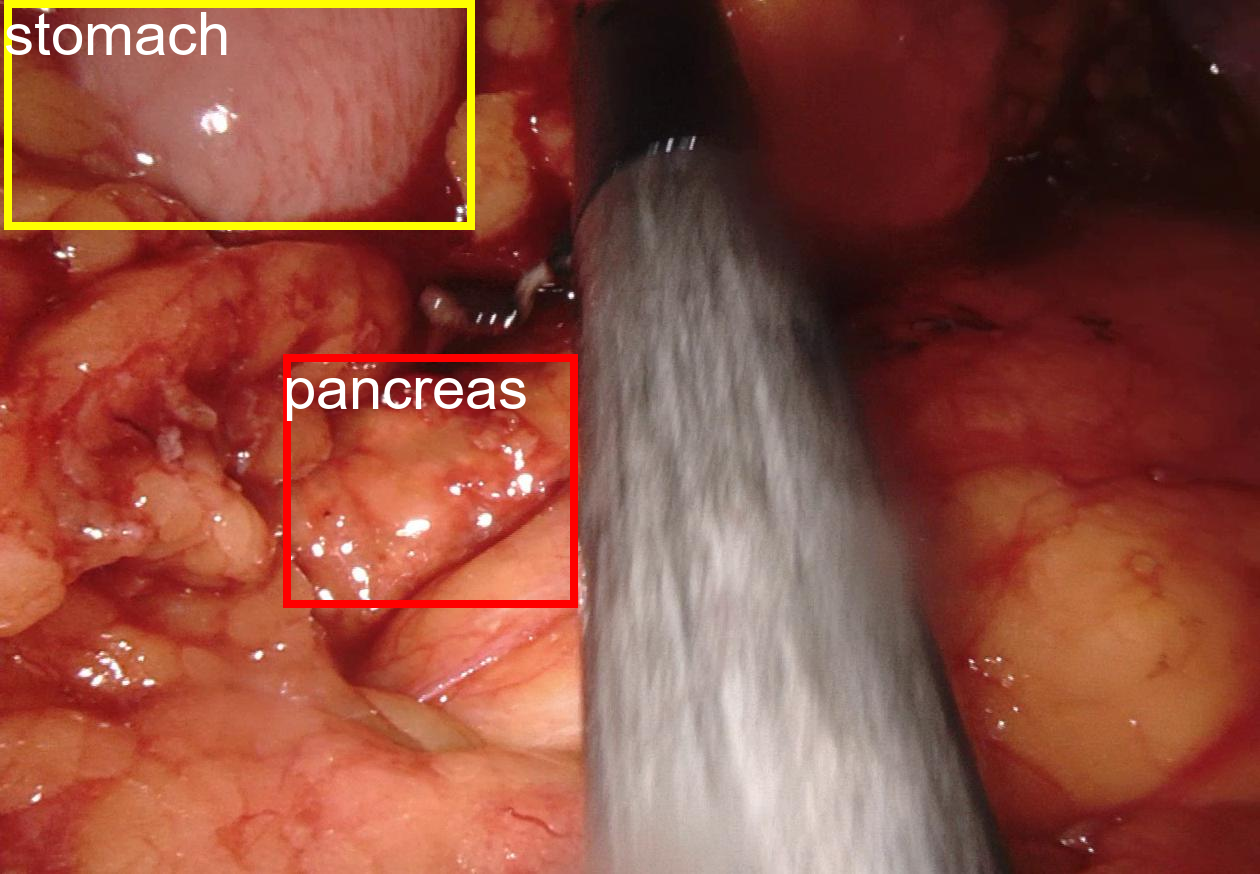

In [11]:
import numpy as np
import os
from PIL import Image, ImageDraw, ImageFont

# based on https://github.com/woctezuma/finetune-detr/blob/master/finetune_detr.ipynb
image_ids = train_dataset.coco.getImgIds()
# let's pick a random image
# image_id = image_ids[np.random.randint(0, len(image_ids))]
image_id = 22277
print('Image n°{}'.format(image_id))
image = train_dataset.coco.loadImgs(image_id)[0]
image = Image.open(os.path.join(train_img_folder, image['file_name']))

annotations = train_dataset.coco.imgToAnns[image_id]
draw = ImageDraw.Draw(image, "RGBA")

cats = train_dataset.coco.cats
id2label = {k: v['name'] for k,v in cats.items()}

# Specify the font size and load a font
font_path = "C:/Windows/Fonts/Arial.ttf"  # Path to a .ttf font file
font_size = 60 # Specify the font size
font = ImageFont.truetype(font_path, font_size)

colour = ['red', 'yellow']
text_col = ['green', 'blue']

for i, annotation in enumerate(annotations):
  box = annotation['bbox']
  class_idx = annotation['category_id']
  x,y,w,h = tuple(box)
  draw.rectangle((x,y,x+w,y+h), outline=colour[i], width=8)
  draw.text((x, y), id2label[class_idx], fill='white', font=font)

image